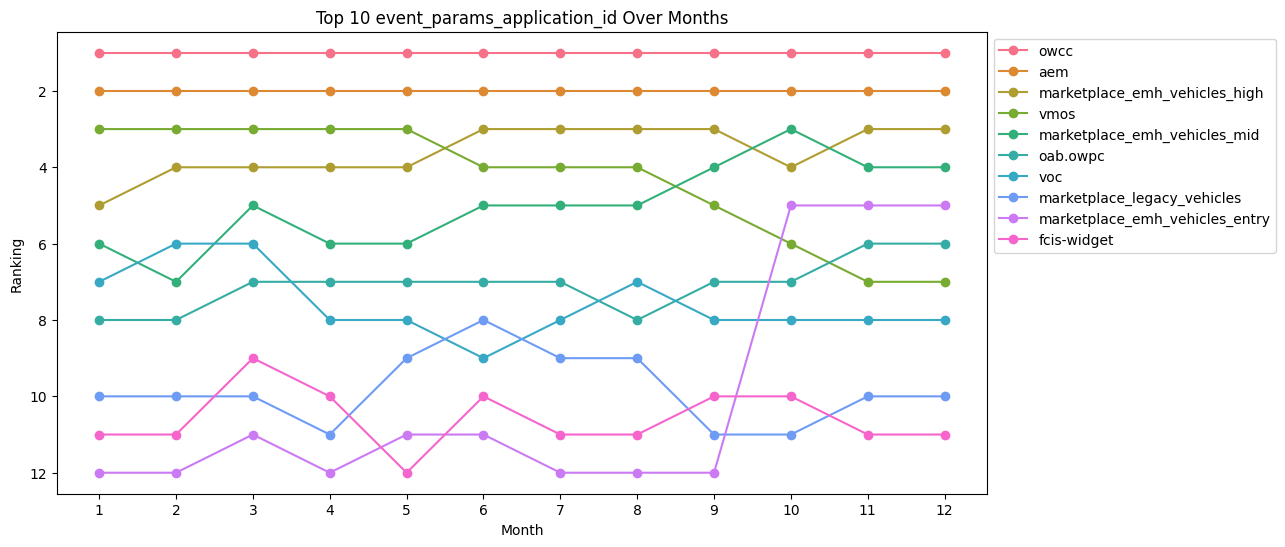

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados do arquivo CSV
file_path = "./csv/AEVDT_6129___VMOS_Dashboard_Test.csv"
df = pd.read_csv(file_path)

# Renomear colunas para garantir compatibilidade
df.columns = ["year", "month", "event_params_application_id", "count_users"]

# Agregar os valores duplicados por mês e aplicação somando os usuários
df_grouped = df[df['year'] == 2024].groupby(["year", "month", "event_params_application_id"], as_index=False).sum()

# Criar o ranking dentro de cada mês (menor número = melhor posição)
df_grouped["rank"] = df_grouped.groupby("month")["count_users"].rank(method="dense", ascending=False)

# Selecionar as 10 aplicações mais relevantes com base no ranking médio
top_apps = df_grouped.groupby("event_params_application_id")["rank"].mean().nsmallest(10).index

# Filtrar o DataFrame para incluir apenas essas aplicações
df_filtered = df_grouped[df_grouped["event_params_application_id"].isin(top_apps)]

# Criar o gráfico de bump chart
plt.figure(figsize=(12, 6))

# Definir uma paleta de cores
colors = sns.color_palette("husl", n_colors=len(top_apps))

# Criar as linhas do bump chart para cada aplicação
for i, app in enumerate(top_apps):
    app_data = df_filtered[df_filtered["event_params_application_id"] == app]
    plt.plot(app_data["month"], app_data["rank"], marker="o", label=app, color=colors[i])

# Ajustar o eixo Y para refletir ranking (1 no topo)
plt.gca().invert_yaxis()

# Adicionar labels e título
plt.xticks(df_filtered["month"].unique())
plt.xlabel("Month")
plt.ylabel("Ranking")
plt.title("Top 10 event_params_application_id Over Months")

# Mostrar a legenda
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

# Exibir o gráfico
plt.show()
